<a href="https://colab.research.google.com/github/tobias-hoepfl/Digital-Organizations-SE/blob/main/learning_portfolio/2_iris_flowers_Hoepfl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iris flower classification using various approaches from a simple TLU to a neural network

**Goal:**

Classify iris flowers based on features of their petal and sepal using a simple threshold logic unit and a small neural network (method: compare the chapter 4: MNIST basics)

<br>

**Sorce of dataset:**

Directly from sklearn datasets. Import done according to https://gist.github.com/srishtis/10d8e8cecfa128ff694bd8846f825135

<br>

**Description of dataset on Kaggle:**

Context:

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines
Content

The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).
Acknowledgements

This dataset is free and is publicly available at the UCI Machine Learning Repository 

##Preparation

In [2]:
#Imports
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [3]:
#import directly from sklearn
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True)

##Data exploration and visualization

In [4]:
iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris_df['class'].value_counts()
#50 of each kind

0    50
1    50
2    50
Name: class, dtype: int64

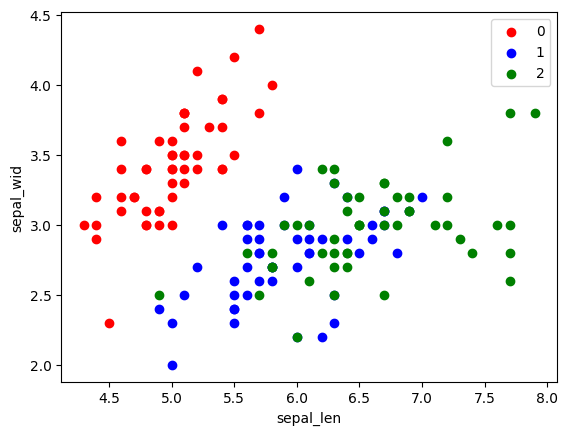

In [6]:
#Scatter plot for sepal
fig, ax = plt.subplots()
cdict = {0: 'red', 1: 'blue', 2: 'green'}
for iris_class in iris_df['class'].unique():
  d = iris_df[iris_df['class'] == iris_class]
  ax.scatter(x='sepal_len', y = 'sepal_wid', c=cdict[iris_class], label = iris_class, data=d)
ax.legend()
ax.set_xlabel('sepal_len')
ax.set_ylabel('sepal_wid')
plt.show()

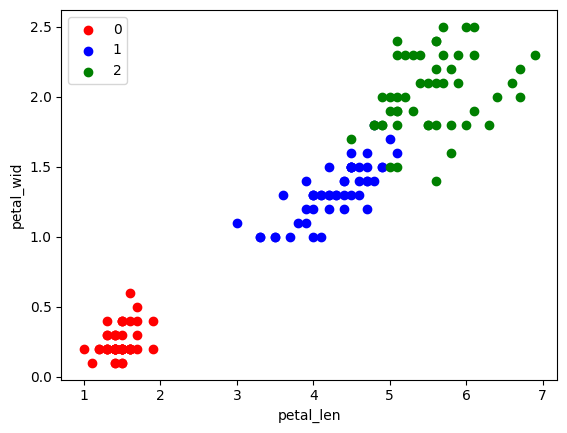

In [7]:
#Scatter plot for petal
fig, ax = plt.subplots()
cdict = {0: 'red', 1: 'blue', 2: 'green'}
for iris_class in iris_df['class'].unique():
  d = iris_df[iris_df['class'] == iris_class]
  ax.scatter(x='petal_len', y = 'petal_wid', c=cdict[iris_class], label = iris_class, data=d)
ax.legend()
ax.set_xlabel('petal_len')
ax.set_ylabel('petal_wid')
plt.show()

Observation:

Sepal:
- Class 0 seems to be easily linearily separable from the others
- For classes 1 and 2 this seems to be more difficult

Petals:
- Also here classes 1 and 2 seem to have less overlaps

Further proceeding:
- A TLU is a binary classifier, so I just stick to distinguishinging classes 1 and 2 (class 0 seems to be too obvious to distinguish, but 1 and 2 more challenging)
- To keep things simple, I just use the two petal features
- As we want the labels to be 0 and 1 (for sigmoid), we rename the labels

In [8]:
#remove sepal features
iris_df = iris_df.drop(['sepal_len', 'sepal_wid'], axis = 1)
#remove class 0
iris_df = iris_df[iris_df['class'] != 0]

#We now have classes 1 and 2, but we want the labels to be 0 and 1 (to be used with sigmoid), so we change it
iris_df['class'] = iris_df['class'] -1

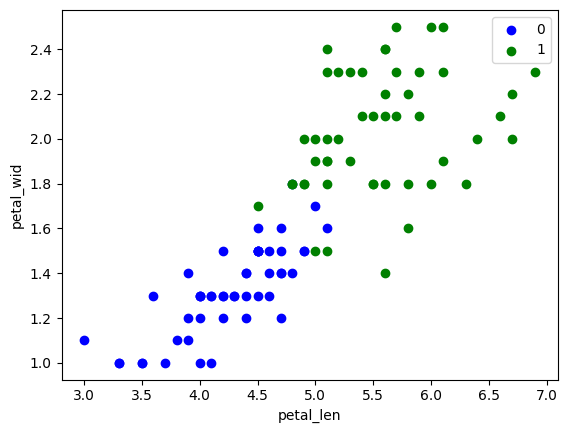

In [9]:
#Now we plot again for the simplified data set
fig, ax = plt.subplots()
cdict = {0: 'blue', 1: 'green'}
for iris_class in iris_df['class'].unique():
  d = iris_df[iris_df['class'] == iris_class]
  ax.scatter(x='petal_len', y = 'petal_wid', c=cdict[iris_class], label = iris_class, data=d)
ax.legend()
ax.set_xlabel('petal_len')
ax.set_ylabel('petal_wid')
plt.show()

#So our goal is to draw a line that can distinguish the two classes

I left train and test set separation out for various reasons:
- The data set is two small: We have just 100 instances left, so the test set would be only 20
- The main goal here is to explore the algorithms themself
- Still keep in mind that in a real world application, overfitting would be an issue


In [10]:
#Train and test set separation can be done optionally:

#separate train set and test set
#from sklearn.model_selection import train_test_split
#train_set, test_set = train_test_split(iris_df, test_size=0.2, random_state=42)

## TLU

In [11]:
#Transform to Pytorch tensors
tensor = torch.tensor(iris_df.values)

#features
x = tensor[:,0:2]

#target labels
y = tensor[:,2]

In [12]:
#Same TLU as in assignment (i.e., using sigmoid step function)
def f(x, params):
    a,b,c = params
    return 1/(1+torch.exp(a*x[:,0] + b*x[:,1] + c))

#Example
print(f(x, [3,-2,1]))

tensor([4.5517e-06, 1.0130e-05, 3.0511e-06, 3.0432e-05, 7.5045e-06, 6.7904e-06,
        6.7904e-06, 1.3637e-04, 5.0304e-06, 5.0172e-05, 7.4846e-05, 2.4915e-05,
        1.6701e-05, 4.5517e-06, 1.0103e-04, 1.1195e-05, 1.0130e-05, 1.2373e-05,
        1.0130e-05, 2.7536e-05, 7.5045e-06, 3.0432e-05, 3.0511e-06, 3.0511e-06,
        1.2373e-05, 1.1195e-05, 3.3720e-06, 3.3720e-06, 1.0130e-05, 7.4846e-05,
        3.7169e-05, 4.1078e-05, 3.3632e-05, 2.0452e-06, 1.0130e-05, 1.2373e-05,
        5.5595e-06, 9.1660e-06, 2.2544e-05, 3.0432e-05, 7.5045e-06, 6.1442e-06,
        2.4915e-05, 1.3637e-04, 1.6701e-05, 1.3674e-05, 1.6701e-05, 1.2373e-05,
        4.0957e-04, 2.2544e-05, 8.3153e-07, 3.7266e-06, 5.0435e-07, 6.8080e-07,
        8.3153e-07, 6.1761e-08, 1.5112e-05, 8.3368e-08, 3.7363e-07, 6.1601e-07,
        4.5517e-06, 2.0452e-06, 1.6745e-06, 6.1442e-06, 1.0130e-05, 4.5517e-06,
        9.1898e-07, 5.5883e-08, 3.7460e-08, 2.2603e-06, 1.3710e-06, 8.2938e-06,
        3.7460e-08, 5.5595e-06, 9.1898e-

In [13]:
#parameters are initialized randomly
torch.manual_seed(4)
params = torch.randn(3).requires_grad_()

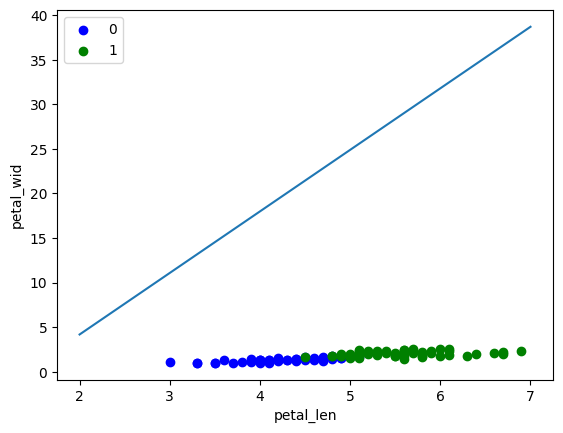

In [14]:
#Plot initial decision boundary
#Extract parameters
a_param, b_param, c_param = params
a_param = a_param.item()
b_param = b_param.item()
c_param = c_param.item()

#Now we plot again for the simplified data set including a decision boundary
import numpy as np

fig, ax = plt.subplots()
cdict = {0: 'blue', 1: 'green'}
for iris_class in iris_df['class'].unique():
  d = iris_df[iris_df['class'] == iris_class]
  ax.scatter(x='petal_len', y = 'petal_wid', c=cdict[iris_class], label = iris_class, data=d)
ax.legend()
ax.set_xlabel('petal_len')
ax.set_ylabel('petal_wid')

#now we want to plot the decision boundary (i.e. from where our final model would predict the flower to be class 0 or 1)
x_axis = np.linspace(2, 7, 100)
y_axis = -(a_param*x_axis + c_param)/ b_param

plt.plot(x_axis, y_axis)

plt.show()
#one can see that the initial decision boundary does not make any sense

In [15]:
#Loss function: MAE

def mae(preds, targets): return (abs(preds-targets)).mean()
#should be minimized

In [16]:
#stochastic gradient descent (compare assignment and fastAI)
#learning rate
lr = 3

def apply_step(params, prn=True):
    #calculate predictions
    preds = f(x, params)
    #calculate loss with function defined before
    loss = mae(preds, y)
    #calculate gradient
    loss.backward()
    #parameters are updated using the learning rate and the gradient
    params.data -= lr * params.grad.data
    params.grad = None
    #Print parameters and current loss
    if prn: print(params);print(loss.item())
    return preds

#We apply it 1000 times
for i in range(1000): apply_step(params)

#Observation: choice of initial parameters makes a difference, therefore a manual seed was defined in the beginning

tensor([-1.5267,  0.2556,  2.2614], requires_grad=True)
0.4925453492687781
tensor([-1.4205,  0.2865,  2.2906], requires_grad=True)
0.4897544207238605
tensor([-1.2642,  0.3309,  2.3340], requires_grad=True)
0.48441587606940095
tensor([-1.0091,  0.3996,  2.4066], requires_grad=True)
0.47213909942261467
tensor([-0.6633,  0.4648,  2.5254], requires_grad=True)
0.44045751314385206
tensor([-1.1120,  0.2141,  2.5255], requires_grad=True)
0.4356003161947305
tensor([-0.7430,  0.3074,  2.6341], requires_grad=True)
0.4537031775461736
tensor([-0.8685,  0.1700,  2.6920], requires_grad=True)
0.4162616344502071
tensor([-0.5638,  0.2023,  2.8179], requires_grad=True)
0.4167959388633771
tensor([-1.1730, -0.0967,  2.7832], requires_grad=True)
0.4307579873626809
tensor([-8.2919e-01, -1.1398e-03,  2.8784e+00], requires_grad=True)
0.46221083454885536
tensor([-0.5074,  0.0355,  3.0098], requires_grad=True)
0.40666146581140855
tensor([-1.1997, -0.2872,  2.9550], requires_grad=True)
0.4285636721851037
tensor([

In [17]:
#if between 0 and 0.5 -> we predict 0
#if between 0.5 and 1 -> we predict 1
predictions = f(x, params)
final_preds = torch.where(predictions < 0.5, 0, 1)

print(final_preds)

print(y)

accuracy = torch.where(final_preds == y, 1., 0.).mean()
print('Accuracy:',accuracy)

#number of wrong predictions
wrongs = torch.where(final_preds == y, 0., 1.).sum()
print('Wrong instances:', wrongs)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
Accuracy: tensor(0.9400)
Wrong instances: tensor(6.)


- Now we want to plot the decision boundary (i.e. from where our final model would predict the flower to be class 0 or 1)
- Our function was:
```
def f(x, params):
    a,b,c = params
    return 1/(1+torch.exp(a*x[:,0] + b*x[:,1] + c))
```
- Or more mathematically:
```
p = 1/(1+e^(a*x + b*y + c))
where
p...prediction (between 0 and 1)
x...petal_len
y...petal_width
a, b, c...parameters
```

- As our decision boundary is exactly at 0.5, we can set p to be equal to 0.5 and then solve for y
- Equation was solved using https://www.symbolab.com/solver
- The resulting equation, which we will plot is:
```
y = -(a*x+c)/(b)
```

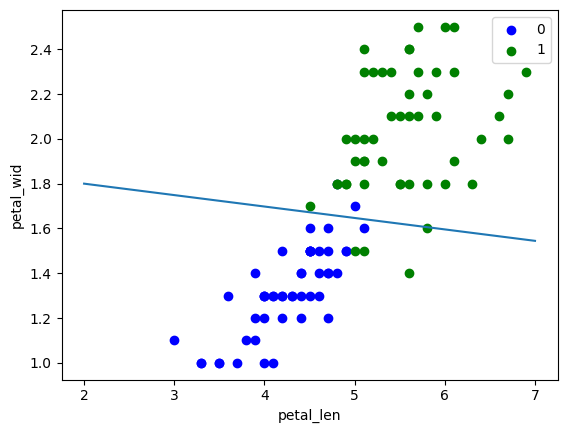

In [18]:
#Extract parameters
a_param, b_param, c_param = params
a_param = a_param.item()
b_param = b_param.item()
c_param = c_param.item()

#Now we plot again for the simplified data set including a decision boundary
import numpy as np

fig, ax = plt.subplots()
cdict = {0: 'blue', 1: 'green'}
for iris_class in iris_df['class'].unique():
  d = iris_df[iris_df['class'] == iris_class]
  ax.scatter(x='petal_len', y = 'petal_wid', c=cdict[iris_class], label = iris_class, data=d)
ax.legend()
ax.set_xlabel('petal_len')
ax.set_ylabel('petal_wid')

#now we want to plot the decision boundary (i.e. from where our final model would predict the flower to be class 0 or 1)
x_axis = np.linspace(2, 7, 100)
y_axis = -(a_param*x_axis + c_param)/ b_param

plt.plot(x_axis, y_axis)

plt.show()
#one can see that some of the instances of each class are in the wrong group -> maybe a non-linear function can lead to a better fit (see next part)

## Neural network

Now we want to introduce non-linearity in a very simple neural network (Compare 04_mnist._basics.ipynb).

In [19]:
#makes problems otherwise
x = x.to(torch.float32)

In [20]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [21]:
#Create our model
torch.manual_seed(4)
simple_net = torch.nn.Sequential(
    torch.nn.Linear(2,4),
    torch.nn.ReLU(),
    torch.nn.Linear(4,1),
)
print(list(simple_net.parameters()))
#initial predictions
print('Initial predictions:')
print(simple_net(x).flatten())
#learning rate
lr=0.01

#Create optimizer class
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

#Create instance of optimizer class
opt = BasicOptim(simple_net.parameters(), lr)

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mse(preds, yb)
    print('Loss:', loss.item())
    loss.backward()

#Train with each mini batch
def train_epoch(model):
    calc_grad(x, y, model)
    opt.step()
    opt.zero_grad()

def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)

train_model(simple_net, 20)

[Parameter containing:
tensor([[ 0.0843,  0.0836],
        [-0.5778, -0.4101],
        [-0.6969, -0.6520],
        [ 0.6971,  0.5842]], requires_grad=True), Parameter containing:
tensor([ 0.1677,  0.6709, -0.2561, -0.4033], requires_grad=True), Parameter containing:
tensor([[ 0.4263, -0.0265,  0.0949,  0.2956]], requires_grad=True), Parameter containing:
tensor([0.2635], requires_grad=True)]
Initial predictions:
tensor([1.6447, 1.6172, 1.7140, 1.4545, 1.6414, 1.5755, 1.6864, 1.2226, 1.5997,
        1.4512, 1.2710, 1.5446, 1.3920, 1.6447, 1.3577, 1.5721, 1.6172, 1.4162,
        1.6172, 1.3887, 1.7523, 1.4545, 1.7140, 1.6031, 1.5271, 1.5721, 1.6689,
        1.7798, 1.6172, 1.2710, 1.3645, 1.3194, 1.4095, 1.7832, 1.6172, 1.6380,
        1.6656, 1.5513, 1.4787, 1.4545, 1.5305, 1.6205, 1.4337, 1.2226, 1.5029,
        1.4821, 1.5029, 1.5271, 1.1709, 1.4787, 2.1885, 1.8457, 2.0809, 1.9459,
        2.0776, 2.2503, 1.6588, 2.1152, 1.9943, 2.2127, 1.8665, 1.8941, 1.9841,
        1.8423, 1.9498, 

In [22]:
print(list(simple_net.parameters()))

[Parameter containing:
tensor([[-0.0323,  0.0422],
        [-0.5778, -0.4101],
        [-0.6969, -0.6520],
        [ 0.6367,  0.5631]], requires_grad=True), Parameter containing:
tensor([ 0.1459,  0.6709, -0.2561, -0.4149], requires_grad=True), Parameter containing:
tensor([[ 0.3992, -0.0265,  0.0949,  0.0705]], requires_grad=True), Parameter containing:
tensor([0.2108], requires_grad=True)]


In [23]:
#if between 0 and 0.5 -> we predict 0
#if between 0.5 and 1 -> we predict 1

predictions = simple_net(x).flatten()
print('Predictions:')

print(predictions)
final_preds = torch.where(predictions < 0.5, 0, 1)

print('Final classification:')
print(final_preds)

print('True label y:')
print(y)

accuracy = torch.where(final_preds == y, 1., 0.).mean()
print('Accuracy:',accuracy)

#number of wrong predictions
wrongs = torch.where(final_preds == y, 0., 1.).sum()
print('Wrong instances:', wrongs)

Predictions:
tensor([0.4692, 0.4685, 0.4813, 0.4412, 0.4717, 0.4572, 0.4805, 0.4018, 0.4604,
        0.4436, 0.4082, 0.4589, 0.4242, 0.4692, 0.4284, 0.4596, 0.4685, 0.4274,
        0.4685, 0.4267, 0.4950, 0.4412, 0.4813, 0.4579, 0.4508, 0.4596, 0.4724,
        0.4958, 0.4685, 0.4082, 0.4235, 0.4146, 0.4323, 0.4933, 0.4685, 0.4741,
        0.4749, 0.4540, 0.4444, 0.4412, 0.4483, 0.4660, 0.4355, 0.4018, 0.4476,
        0.4419, 0.4476, 0.4508, 0.3979, 0.4444, 0.5730, 0.5103, 0.5472, 0.5206,
        0.5496, 0.5695, 0.4798, 0.5430, 0.5270, 0.5762, 0.5159, 0.5167, 0.5344,
        0.5127, 0.5386, 0.5393, 0.5174, 0.5784, 0.5904, 0.4845, 0.5521, 0.5095,
        0.5671, 0.4982, 0.5408, 0.5334, 0.4950, 0.4982, 0.5376, 0.5157, 0.5422,
        0.5575, 0.5432, 0.4877, 0.4980, 0.5649, 0.5545, 0.5174, 0.4950, 0.5312,
        0.5545, 0.5329, 0.5103, 0.5585, 0.5634, 0.5361, 0.5071, 0.5191, 0.5425,
        0.5046], grad_fn=<ReshapeAliasBackward0>)
Final classification:
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 

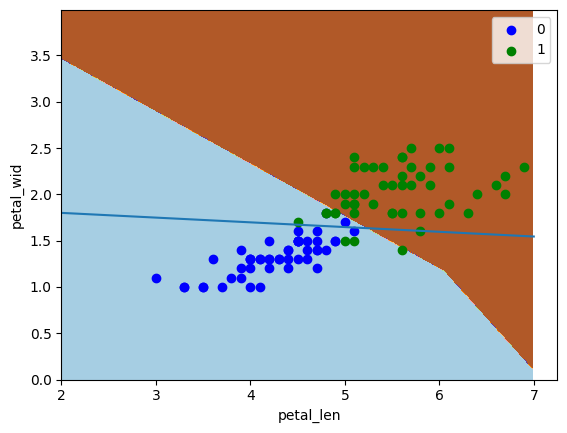

In [45]:
#Plot now the decision boundary of the neural network in comparison to the linear model before
import matplotlib.pyplot as pl
import numpy as np

#I use a grid of feature combinations in order to determine the decision boundary
x_min, x_max = 2., 7.
y_min, y_max = 0., 4.
xs, ys = torch.meshgrid(torch.arange(x_min, x_max, 0.01),
                     torch.arange(y_min, y_max, 0.01))

input_grid = torch.stack((xs.ravel(), ys.ravel()), 1)

#We use the neural network to predict for the input_grid
preds = simple_net(input_grid)
final_preds = torch.where(preds < 0.5, 0, 1)

#We need them in another shape for the plot
final_preds = final_preds.reshape(xs.shape)

#Plotting
fig, ax = plt.subplots()

#Plot decision boundary of neural network
#Seems to only work with numpy, therefore change from tensor to numpy first
plt.contourf(xs.detach().numpy(), ys.detach().numpy(), final_preds.detach().numpy(), cmap=plt.cm.Paired)

#Plot decision boundary from the linear model (as done before)
a_param, b_param, c_param = params
a_param = a_param.item()
b_param = b_param.item()
c_param = c_param.item()

#plot training points
cdict = {0: 'blue', 1: 'green'}
for iris_class in iris_df['class'].unique():
  d = iris_df[iris_df['class'] == iris_class]
  ax.scatter(x='petal_len', y = 'petal_wid', c=cdict[iris_class], label = iris_class, data=d)
ax.legend()
ax.set_xlabel('petal_len')
ax.set_ylabel('petal_wid')

#now we want to plot the decision boundary from the linear model (i.e. from where our final model would predict the flower to be class 0 or 1)
x_axis = np.linspace(2, 7, 100)
y_axis = -(a_param*x_axis + c_param)/ b_param

plt.plot(x_axis, y_axis)

plt.show()

Unclear why the neural network cannot provide a better model than the single TLU

I tried with different parameters, but the neural network always degenerates to a state where it predicts the same label for every input